In [ ]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.5 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 36.6/107.7 GB disk)


!ls /content/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()

Polygon Counter Initiated.

0: 448x640 6 persons, 203.9ms
Speed: 4.7ms preprocess, 203.9ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)


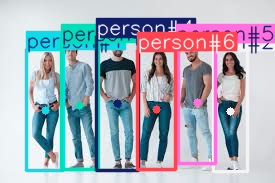

Video frame is empty or video processing has been successfully completed.


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from ultralytics import YOLO, solutions

# Load the YOLO model
model = YOLO("yolov8n.pt")

# Open video file
cap = cv2.VideoCapture("/content/drive/MyDrive/download.jpeg")
assert cap.isOpened(), "Error reading video file"

# Video properties
w, h, fps = (int(cap.get(x)) for x in (cv2.CAP_PROP_FRAME_WIDTH, cv2.CAP_PROP_FRAME_HEIGHT, cv2.CAP_PROP_FPS))

# Define region points
region_points = [(20, 400), (1080, 404), (1080, 360), (20, 360)]

# Video writer
video_writer = cv2.VideoWriter("object_counting_output.avi", cv2.VideoWriter_fourcc(*"mp4v"), fps, (w, h))

# Initialize Object Counter
counter = solutions.ObjectCounter(
    view_img=True,
    reg_pts=region_points,
    names=model.names,
    draw_tracks=True,
    line_thickness=2,
)

while cap.isOpened():
    success, im0 = cap.read()
    if not success:
        print("Video frame is empty or video processing has been successfully completed.")
        break

    # Track objects
    tracks = model.track(im0, persist=True, show=False)

    # Count objects
    im0 = counter.start_counting(im0, tracks)

    # Write the processed frame to the output video
    video_writer.write(im0)

    # Show the frame
    cv2_imshow(im0)

cap.release()
video_writer.release()
cv2.destroyAllWindows()

# Save the model
model.save("/content/drive/MyDrive/saved_yolo_model.pth")


/usr/local/lib/python3.10/dist-packages/torch/hub.py:295: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


requirements: Ultralytics requirements ['gitpython>=3.1.30', 'pillow>=10.3.0'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 155.9 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0

requirements: AutoUpdate success ✅ 6.4s, installed 2 packages: ['gitpython>=3.1.30', 'pillow>=10.3.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



YOLOv5 🚀 2024-9-2 Python-3.10.12 torch-2.4.0+cu121 CPU

100%|██████████| 14.1M/14.1M [00:00<00:00, 130MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 251x201 1 person
Speed: 11.7ms pre-process, 675.7ms inference, 6.2ms NMS per image at shape (1, 3, 640, 512)


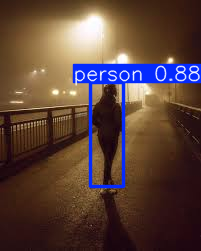

Detected person with confidence 0.88


In [ ]:
import torch
from pathlib import Path
import cv2

# Load YOLOv5 model (choose your model version, e.g., yolov5s, yolov5m, etc.)
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# Load an image
img = cv2.imread('/content/drive/MyDrive/n85.jpeg')

# Run YOLOv5 inference
results = model(img)

# Display results
results.print()  # Print results to the console
results.show()   # Display results

# Get the detections
detections = results.pandas().xyxy[0]  # DataFrame with detections

# Iterate over detections and process them
for index, detection in detections.iterrows():
    xmin, ymin, xmax, ymax, confidence, class_id, name = detection
    print(f'Detected {name} with confidence {confidence:.2f}')


In [ ]:
# Step 1: Download YOLO files
!wget -q https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
!wget -q https://pjreddie.com/media/files/yolov3.weights
!wget -q https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names

# Step 2: Import required libraries
import cv2
import numpy as np

# Step 3: Load YOLO
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]

# Load classes
classes = []
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

# Step 4: Upload the video file to Google Colab
from google.colab import files
uploaded = files.upload()

# Get the uploaded video file name
video_path = list(uploaded.keys())[0]

# Step 5: Load video
cap = cv2.VideoCapture(video_path)
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
out = cv2.VideoWriter('output_video.mp4', cv2.VideoWriter_fourcc(*'MP4V'), 20.0, (frame_width, frame_height))

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Prepare the image for YOLO
    blob = cv2.dnn.blobFromImage(frame, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
    net.setInput(blob)
    outs = net.forward(output_layers)

    class_ids = []
    confidences = []
    boxes = []

    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5 and class_id == 0:  # Class ID 0 corresponds to 'person' in COCO dataset
                center_x = int(detection[0] * frame_width)
                center_y = int(detection[1] * frame_height)
                w = int(detection[2] * frame_width)
                h = int(detection[3] * frame_height)
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            color = (0, 255, 0)  # Green color for the bounding box
            cv2.rectangle(frame, (x, y), (x + w, y + h), color, 2)
            cv2.putText(frame, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    # Write the frame into the output video
    out.write(frame)

cap.release()
out.release()

# Step 6: Download the output video
from google.colab import files
files.download('output_video.mp4')


IndexError: invalid index to scalar variable.

In [ ]:
!pip install roboflow --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.3 MB/s eta 0:00:00


In [ ]:
!pip install ultralytics



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 871.6/871.6 kB 12.8 MB/s eta 0:00:00


In [ ]:
!ls /content/project1-1


ls: cannot access '/content/project1-1': No such file or directory


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="il37TDT2lO4naSkCQQXC")
project = rf.workspace("test-hirmn").project("project1-rsvx0-36n6c")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.93, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to project1-1 in yolov8:: 100%|██████████| 6306/6306 [00:01<00:00, 5650.18it/s]


In [ ]:
from ultralytics import YOLO

# Load YOLOv8 model (for detection task)
model = YOLO('yolov8s.pt')  # Load pre-trained model

# Train the model
model.train(data='/content/project1-1/data.yaml', epochs=25, imgsz=800)





Ultralytics YOLOv8.2.93 🚀 Python-3.10.12 torch-2.4.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/project1-1/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train7, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show

train: Scanning /content/project1-1/train/labels.cache... 2580 images, 0 backgrounds, 2 corrupt: 100%|██████████| 2582/2582 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/project1-1/train/images/D_0092_jpg.rf.32def138ac1ac02546bed028e1d771e1.jpg: ignoring corrupt image/label: image size (74, 8) <10 pixels
train: WARNING ⚠️ /content/project1-1/train/images/D_0092_jpg.rf.3575a26922e513011be36de05a28f3bb.jpg: ignoring corrupt image/label: image size (74, 8) <10 pixels


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.15 (you have 1.4.14). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/project1-1/valid/labels.cache... 337 images, 0 backgrounds, 0 corrupt: 100%|██████████| 337/337 [00:00<?, ?it/s]


Plotting labels to runs/detect/train7/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 800 train, 800 val
Using 0 dataloader workers
Logging results to runs/detect/train7
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25         0G      1.387      3.459      1.722         56        800:   1%|          | 1/162 [01:27<3:54:44, 87.48s/it]

100%|██████████| 6.25M/6.25M [00:00<00:00, 22.5MB/s]



0: 448x640 2 cars, 1 bus, 746.8ms
Speed: 53.5ms preprocess, 746.8ms inference, 46.3ms postprocess per image at shape (1, 3, 448, 640)


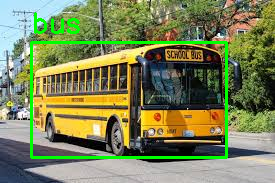

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from ultralytics import YOLO

# Load the YOLO model (you can specify your custom trained model for bus detection)
model = YOLO("yolov8n.pt")

# Open the image file
image_path = "/content/drive/MyDrive/images (1).jpeg"
image = cv2.imread(image_path)
assert image is not None, "Error reading the image file"

# Perform object detection on the image
results = model(image)

# Draw bounding boxes around detected objects
for result in results:
    boxes = result.boxes.xyxy  # Get the bounding box coordinates
    labels = result.names  # Get object labels

    for i, box in enumerate(boxes):
        x1, y1, x2, y2 = map(int, box)  # Extract coordinates
        label = result.names[result.boxes.cls[i].item()]  # Get the label for the object detected

        if label == "bus":  # Filter for 'bus' objects
            # Draw a rectangle for the bounding box
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            # Add label to the image
            cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

# Show the result
cv2_imshow(image)

cv2.waitKey(0)
cv2.destroyAllWindows()



0: 448x640 2 cars, 1 bus, 1 train, 1 truck, 375.5ms
Speed: 6.4ms preprocess, 375.5ms inference, 2.9ms postprocess per image at shape (1, 3, 448, 640)


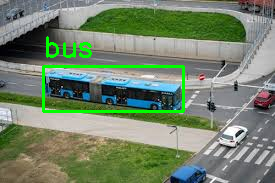

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from ultralytics import YOLO

# Load the YOLO model (you can specify your custom trained model for bus detection)
model = YOLO("yolov8n.pt")

# Open the image file
image_path = "/content/drive/MyDrive/images (1)cars.jpeg"
image = cv2.imread(image_path)
assert image is not None, "Error reading the image file"

# Perform object detection on the image
results = model(image)

# Draw bounding boxes around detected objects
for result in results:
    boxes = result.boxes.xyxy  # Get the bounding box coordinates
    labels = result.names  # Get object labels

    for i, box in enumerate(boxes):
        x1, y1, x2, y2 = map(int, box)  # Extract coordinates
        label = result.names[result.boxes.cls[i].item()]  # Get the label for the object detected

        if label == "bus":  # Filter for 'bus' objects
            # Draw a rectangle for the bounding box
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            # Add label to the image
            cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

# Show the result
cv2_imshow(image)

cv2.waitKey(0)
cv2.destroyAllWindows()



0: 448x640 2 cars, 1 bus, 1 train, 1 truck, 220.4ms
Speed: 7.7ms preprocess, 220.4ms inference, 2.7ms postprocess per image at shape (1, 3, 448, 640)


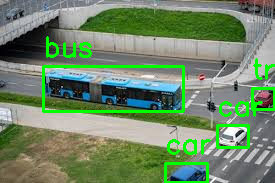

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from ultralytics import YOLO

# Load the YOLO model (you can specify your custom trained model for vehicle detection)
model = YOLO("yolov8n.pt")

# Open the image file
image_path = "/content/drive/MyDrive/images (1)cars.jpeg"
image = cv2.imread(image_path)
assert image is not None, "Error reading the image file"

# Perform object detection on the image
results = model(image)

# List of vehicle categories you want to detect (can vary depending on model used)
vehicle_labels = ["car", "truck", "bus", "motorbike", "bicycle"]  # Add more as needed

# Draw bounding boxes around detected objects
for result in results:
    boxes = result.boxes.xyxy  # Get the bounding box coordinates
    labels = result.names  # Get object labels

    for i, box in enumerate(boxes):
        x1, y1, x2, y2 = map(int, box)  # Extract coordinates
        label = result.names[result.boxes.cls[i].item()]  # Get the label for the object detected

        if label in vehicle_labels:  # Check if the detected object is a vehicle
            # Draw a rectangle for the bounding box
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            # Add label to the image
            cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

# Show the result
cv2_imshow(image)

cv2.waitKey(0)
cv2.destroyAllWindows()



0: 448x640 2 cars, 1 bus, 1 train, 1 truck, 403.5ms
Speed: 15.4ms preprocess, 403.5ms inference, 2.6ms postprocess per image at shape (1, 3, 448, 640)
Detection Accuracy: 0.00%


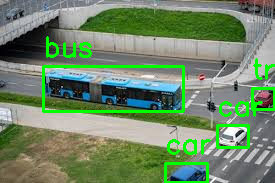

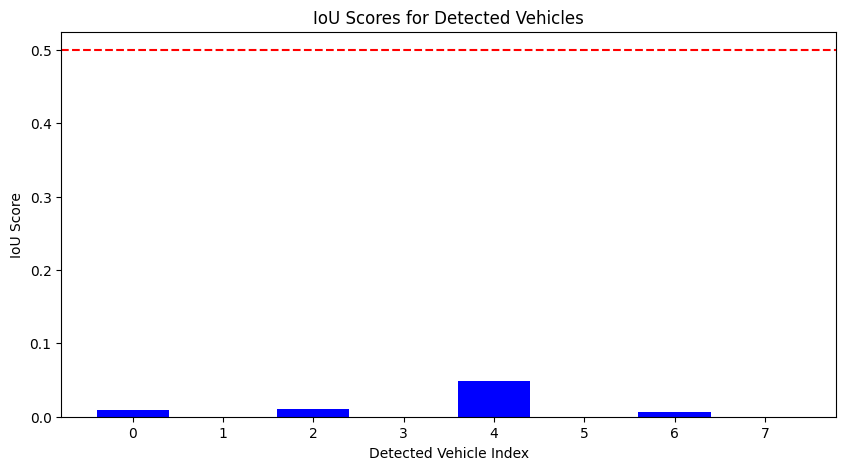

In [ ]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from ultralytics import YOLO

# Function to calculate Intersection over Union (IoU)
def calculate_iou(box1, box2):
    x1, y1, x2, y2 = box1
    x1_gt, y1_gt, x2_gt, y2_gt = box2

    # Calculate intersection coordinates
    xi1, yi1 = max(x1, x1_gt), max(y1, y1_gt)
    xi2, yi2 = min(x2, x2_gt), min(y2, y2_gt)

    # Calculate intersection area
    inter_width = max(0, xi2 - xi1)
    inter_height = max(0, yi2 - yi1)
    inter_area = inter_width * inter_height

    # Calculate union area
    box1_area = (x2 - x1) * (y2 - y1)
    box2_area = (x2_gt - x1_gt) * (y2_gt - y1_gt)
    union_area = box1_area + box2_area - inter_area

    # IoU score
    iou = inter_area / union_area if union_area != 0 else 0
    return iou

# Ground truth for the vehicles (manually annotated bounding boxes)
# Example format: (x1, y1, x2, y2)
ground_truth_boxes = [(100, 50, 400, 300), (500, 50, 900, 300)]  # Replace with actual ground truth

# Load the YOLO model (trained model for vehicle detection)
model = YOLO("yolov8n.pt")

# Open the image file
image_path = "/content/drive/MyDrive/images (1)cars.jpeg"
image = cv2.imread(image_path)
assert image is not None, "Error reading the image file"

# Perform object detection on the image
results = model(image)

# List of vehicle categories (can vary depending on model used)
vehicle_labels = ["car", "truck", "bus", "motorbike", "bicycle"]

iou_scores = []

# Draw bounding boxes around detected objects and calculate IoU
for result in results:
    boxes = result.boxes.xyxy  # Get the bounding box coordinates
    labels = result.names  # Get object labels

    for i, box in enumerate(boxes):
        x1, y1, x2, y2 = map(int, box)  # Extract coordinates
        label = result.names[result.boxes.cls[i].item()]  # Get the label for the object detected

        if label in vehicle_labels:
            # Draw a rectangle for the bounding box
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            # Add label to the image
            cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

            # Calculate IoU for each detected vehicle
            for gt_box in ground_truth_boxes:
                iou = calculate_iou((x1, y1, x2, y2), gt_box)
                iou_scores.append(iou)

# Calculate the accuracy based on IoU (IoU > 0.5 indicates a correct detection)
correct_detections = sum(1 for iou in iou_scores if iou > 0.5)
total_detections = len(iou_scores)
accuracy = (correct_detections / total_detections) * 100 if total_detections > 0 else 0

print(f"Detection Accuracy: {accuracy:.2f}%")

# Show the image with bounding boxes
cv2_imshow(image)

# Plot IoU values
plt.figure(figsize=(10, 5))
plt.bar(range(len(iou_scores)), iou_scores, color='blue')
plt.axhline(y=0.5, color='r', linestyle='--')  # Threshold line for correct detections (IoU > 0.5)
plt.xlabel("Detected Vehicle Index")
plt.ylabel("IoU Score")
plt.title("IoU Scores for Detected Vehicles")
plt.show()

cv2.waitKey(0)
cv2.destroyAllWindows()
